# Overview

- With a few coarse maps completed, ran a few pole-to-pole measurments at the same magnet current
- 1. Used last coarse map and picked a line that appeared to have measurments for all X
- 2. First run was off-center, so did another with where I think the center of the pole is ($y=z=125$ mm)
- 3. 3D grid with 1 cm x 1 cm in YZ, step size 1 mm, and the same X values as before. YZ is centered on the pole center.

# Imports

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype
#from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

# local imports
from plotting import config_plots, datetime_plt
from load_pattern_slow import *
from Zaber_Magnet_Convert import *
# hallprobecalib package
from hallprobecalib.hpcplots import scatter3d

In [3]:
config_plots()

In [4]:
ddir = '/home/ckampa/Dropbox/LogFiles/'

In [5]:
# 6-14-21 15:11 6 x 6 x 51 (new y0, z0)
plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/pole_to_pole/06-14-21_15:11/'
plotdir_pattern = plotdir+'pattern/'
plotdir_pattern = plotdir+'slow/'
patternfile = '2021-06-14 151201.txt'
slowfile = '2021-06-14 151158slow.txt'

# Load Data

In [6]:
'''
def load_data(file, pklname=None):
    with open(file, 'r') as f:
        firstline = f.readline().split(',')
        header = [e.strip(' ').strip('\n') for e in firstline]
    df = pd.read_csv(file, names=header, skiprows=1)
    # parse dates and set as index
    dates = [parser.parse(row.Time) for row in df.itertuples()]
    df['Datetime'] = pd.to_datetime(dates)
    df.sort_values(by=['Datetime'], inplace=True)
    df = df.set_index('Datetime')
    # calculate time since beginning in useful units
    df['seconds_delta'] = (df.index - df.index[0]).total_seconds()
    df['hours_delta'] = (df.index - df.index[0]).total_seconds()/60**2
    df['days_delta'] = (df.index - df.index[0]).total_seconds()/(24*60**2)
    # remove bad column ""
    cols = list(df.columns)
    if "" in cols:
        cols.remove("")
        df = df[cols]
    # save to pickle
    if not pklname is None:
        df.to_pickle(pklname)
    return df
'''
_ = None;

In [41]:
df = load_data(ddir+patternfile)
df_slow = load_data(ddir+slowfile)

In [42]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm
Datetime,,,,,,,,,,,,,,,,,,,,
2021-06-14 15:12:02,6/14/2021 3:12:02 PM,224.061757,28.229500,1.160439,0.0,0.0,0.0,0.0,422190.0,164917.96875,403369.0,157566.015625,1636235.0,639154.296875,0.0,0.000000,0.000000,10.900000,119.6,129.5
2021-06-14 15:13:08,6/14/2021 3:13:08 PM,224.061870,28.456217,1.160442,0.0,422190.0,403369.0,1636235.0,422190.0,164917.96875,403369.0,157566.015625,1636235.0,639154.296875,66.0,0.018333,0.000764,10.900000,119.6,129.5
2021-06-14 15:13:23,6/14/2021 3:13:23 PM,224.061757,28.469150,1.160439,0.0,422190.0,403369.0,1641355.0,422190.0,164917.96875,403369.0,157566.015625,1641355.0,641154.296875,81.0,0.022500,0.000937,10.900000,119.6,127.5
2021-06-14 15:13:37,6/14/2021 3:13:37 PM,224.061700,28.481717,1.160437,0.0,422190.0,403369.0,1646475.0,422190.0,164917.96875,403369.0,157566.015625,1646475.0,643154.296875,95.0,0.026389,0.001100,10.900000,119.6,125.5
2021-06-14 15:13:52,6/14/2021 3:13:52 PM,224.061700,28.494017,1.160435,0.0,422190.0,403369.0,1651595.0,422190.0,164917.96875,403369.0,157566.015625,1651595.0,645154.296875,110.0,0.030556,0.001273,10.900000,119.6,123.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15 00:17:22,6/15/2021 12:17:22 AM,224.061643,29.264217,1.160111,0.0,554790.0,428969.0,1641355.0,554790.0,216714.84375,428969.0,167566.015625,1641355.0,641154.296875,32720.0,9.088889,0.378704,62.696875,129.6,127.5
2021-06-15 00:17:37,6/15/2021 12:17:37 AM,224.061643,29.264350,1.160112,0.0,554790.0,428969.0,1646475.0,554790.0,216714.84375,428969.0,167566.015625,1646475.0,643154.296875,32735.0,9.093056,0.378877,62.696875,129.6,125.5
2021-06-15 00:18:24,6/15/2021 12:18:24 AM,224.061587,29.264617,1.160111,0.0,554790.0,428969.0,1651595.0,554790.0,216714.84375,428969.0,167566.015625,1651595.0,645154.296875,32782.0,9.106111,0.379421,62.696875,129.6,123.5


In [81]:
#df_ = df.query('`NMR [T]` > 0.7')
df_ = df.query('`NMR [T]` > 1.13')

In [82]:
len(df_)

1824

In [43]:
[len(df[f'Zaber_Pattern_{i}'].unique()) for i in ['X', 'Y', 'Z']]

[52, 7, 7]

In [44]:
51*6*6

1836

In [45]:
df_slow

,Time,Magnet Current [A],Magnet Voltage [V],Coil 1,Coil 2,LCW in Coil1,LCW out Coil 1,LCW in Coil 2,LCW out Coil 2,Yoke (near pole),...,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-06-14 15:11:59,6/14/2021 3:11:59 PM,224.061757,28.229500,41.881077,41.728649,30.391476,31.655592,30.444719,35.652348,25.313850,...,157566.015625,403369.0,639154.296875,1636235.0,0.0,0.000000,0.000000,-89.596887,23.583209,518.98465
2021-06-14 15:12:37,6/14/2021 3:12:37 PM,224.061700,28.428233,43.482578,43.253509,30.264072,31.826363,30.837446,36.247639,25.326517,...,157566.015625,403369.0,639154.296875,1636235.0,38.0,0.010556,0.000440,-89.596887,23.583209,518.98465
2021-06-14 15:18:26,6/14/2021 3:18:26 PM,224.061700,28.679117,45.816776,45.570137,30.225132,32.232632,31.238791,37.289669,25.370750,...,163566.015625,418729.0,641154.296875,1641355.0,387.0,0.107500,0.004479,-89.596887,25.926959,518.20340
2021-06-14 15:23:23,6/14/2021 3:23:23 PM,224.061587,28.811400,47.079708,46.843842,30.225801,32.434536,31.391354,37.886932,25.444548,...,167566.015625,428969.0,649154.296875,1661835.0,684.0,0.190000,0.007917,-89.596887,27.489459,515.07840
2021-06-14 15:28:15,6/14/2021 3:28:15 PM,224.061530,28.896450,47.971718,47.698170,30.284893,32.658016,31.647552,38.277176,25.514215,...,161566.015625,413609.0,647154.296875,1656715.0,976.0,0.271111,0.011296,-89.192224,25.145709,515.85965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-15 07:13:09,6/15/2021 7:13:09 AM,224.061247,29.213167,50.725513,50.593704,31.565777,34.091938,33.240395,40.337147,28.580586,...,157566.015625,403369.0,639154.296875,1636235.0,57670.0,16.019444,0.667477,-89.596887,23.583209,518.98465
2021-06-15 07:18:09,6/15/2021 7:18:09 AM,224.061303,29.211083,50.813663,50.593903,31.565697,34.109055,33.186279,40.271988,28.617735,...,157566.015625,403369.0,639154.296875,1636235.0,57970.0,16.102778,0.670949,-89.596887,23.583209,518.98465
2021-06-15 07:23:09,6/15/2021 7:23:09 AM,224.061303,29.209967,50.707359,50.575195,31.610861,34.148987,33.118954,40.285603,28.602734,...,157566.015625,403369.0,639154.296875,1636235.0,58270.0,16.186111,0.674421,-89.596887,23.583209,518.98465


In [46]:
# WRONG COORDINATES

In [47]:
#mag_mm_to_zaber_ADC(416169, 'Y')

In [48]:
# zaber_ADC_to_mag_mm(416169, 'Y')

- This is wrong and needs to be fixed. Should look at carefully soon. Will want it working for presenting results.

In [49]:
# TEST FROM NEW POSITION

In [50]:
ADC_to_mm(416169, 'Y')

124.6

In [51]:
ADC_to_mm(417000, 'Y'), ADC_to_mm(417250, 'Y')

(124.92460937499999, 125.02226562499999)

In [52]:
ADC_to_mm(1649035, 'Z')

124.5

In [53]:
ADC_to_mm(1648000, 'Z'), ADC_to_mm(1647500, 'Z')

(124.904296875, 125.099609375)

In [54]:
ADC_to_mm(1650000, 'Z')

124.123046875

In [55]:
mm_to_ADC(150, 'Z')

1583755.0

In [56]:
mm_to_ADC(227, 'Z') # 3 mm below brass #2

1386635.0

In [57]:
mm_to_ADC(53, 'Z') # 3 mm above brass # 1

1832075.0

- Z limits are off. Should inspect visually after next degauss.

In [58]:
mm_to_ADC(51+spacer_R, 'Y')

NameError: name 'spacer_R' is not defined

In [59]:
mm_to_ADC(226+spacer_R, 'Y')

NameError: name 'spacer_R' is not defined

In [60]:
(700495-637825) * mm_per_ADC

24.48046875

- Y limits also off. Looks to be about the amount from NMR sample to bigger sharpie line. Measure this.

In [61]:
mm_to_ADC(0, 'X')

394286.0

In [62]:
mm_to_ADC(75, 'X')

586286.0

In [63]:
mm_to_ADC(75, 'X') - mm_to_ADC(0, 'X')

192000.0

In [64]:
# actual limits
(554838 - 422190)

132648

In [65]:
(554838 - 422190) * mm_per_ADC

51.815625000000004

In [66]:
(554838 - 422190) * mm_per_ADC + 12-2 + 2 + 10

73.81562500000001

In [67]:
### Testing new columns

In [68]:
len(df['magnet_X_mm'].unique())

51

# Plotting Functions

## Planes of NMR Data

In [69]:
def scatter_plane(df, plane_str, plane_val, X, Y, plotfile=None):
    df_ = df.query(f'magnet_{plane_str}_mm == {plane_val}').copy()
    ADC = df_[f'Zaber_Meas_Encoder_{plane_str}'].iloc[0]
    # plot
    fig, ax = plt.subplots()
    sc = ax.scatter(df_[f'magnet_{X}_mm'], df_[f'magnet_{Y}_mm'], c=df_['NMR [T]'], s=25)
    cb = fig.colorbar(sc, label='NMR [T]')
    ax.set_xlabel(f'{X} [mm]')
    ax.set_ylabel(f'{Y} [mm]')
    fig.suptitle(f'{plane_str} = {plane_val} [mm] = {ADC} [ADC]')
    
    if not plotfile is None:
        fig.savefig(plotfile+'.pdf', facecolor='white', transparent=False)
        fig.savefig(plotfile+'.png', facecolor='white', transparent=False)
    return fig, ax
    
#     xmin = df[f'Zaber_Meas_{mm}_X'].min()
#     df_ = df.query(f'`Zaber_Pattern_X` == {xval}').copy()
#     x_mm = df_[f'Zaber_Meas_{mm}_X'].values[0]
#     ymin = df_[f'Zaber_Meas_{mm}_Y'].min()
#     zmin = -df_[f'Zaber_Meas_{mm}_Z'].max()
#     # plot
#     fig, ax = plt.subplots()
#     sc = ax.scatter(1e-3*(df_[f'Zaber_Meas_{mm}_Y']-ymin), 1e-3*(-df_[f'Zaber_Meas_{mm}_Z']+zmin),
#                     c=df_['NMR [T]'], s=25)
#     cb = fig.colorbar(sc, label='NMR [T]')
#     ax.set_xlabel('Zaber Y [mm]')
#     ax.set_ylabel('Zaber Z [mm]')
#     fig.suptitle(f'Zaber X = {1e-3*(x_mm - xmin)} [mm] = {xval} [ADC]')
# #     fig.suptitle(f'Zaber Encoder X = {xval} [ADC]')
#     #ax.set_facecolor('white')
#     if not plotfile is None:
#         fig.savefig(plotfile+'.pdf', facecolor='white', transparent=False)
#         fig.savefig(plotfile+'.png', facecolor='white', transparent=False)
#     return fig, ax

In [70]:
df['magnet_Z_mm'].unique()

array([129.5, 127.5, 125.5, 123.5, 121.5, 119.5])

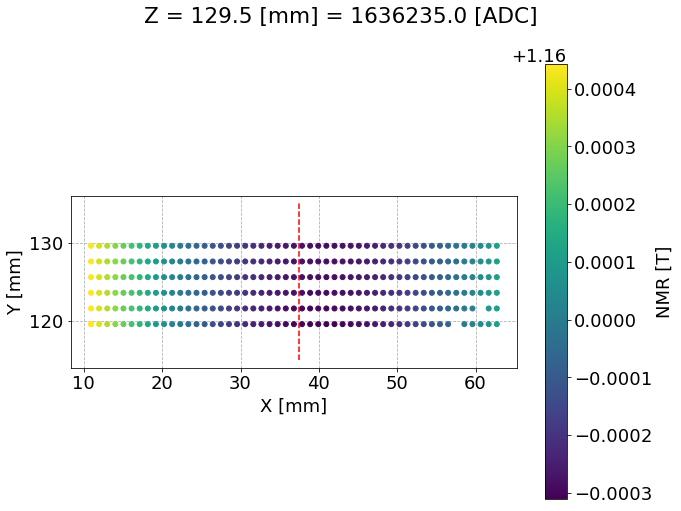

In [75]:
fig, ax = scatter_plane(df_, 'Z', 129.5, 'X', 'Y')
ax.plot([37.5, 37.5],[115, 135], 'r--')
ax.set_aspect('equal')

In [72]:
#from hallprobecalib.hpcplots import scatter3d

In [83]:
fig = scatter3d([df_['magnet_X_mm']], [df_['magnet_Y_mm']], [df_['magnet_Z_mm']], [df_['NMR [T]']], aspect_auto=False)

In [84]:
fig = scatter3d([df_['magnet_X_mm']], [df_['magnet_Y_mm']], [df_['magnet_Z_mm']], [df_['NMR [T]']], [''], size_list=[4], aspect_auto=False, inline=False)

In [85]:
len(df), len(df_)

(1837, 1824)

In [86]:
len(df) - len(df_)

13

In [89]:
df_bad = df.query('`NMR [T]` < 1.13')

In [90]:
len(df_bad)

13

In [91]:
df_bad

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Z,Zaber_Meas_Micron_Z,seconds_delta,hours_delta,days_delta,magnet_X_mm,magnet_Y_mm,magnet_Z_mm
Datetime,,,,,,,,,,,,,,,,,,,,
2021-06-14 23:15:43,6/14/2021 11:15:43 PM,224.061417,29.260117,0.000000,0.0,541530.0,403369.0,1636235.0,541530.0,211535.15625,403369.0,157566.015625,1636235.0,639154.296875,29021.0,8.061389,0.335891,57.517187,119.6,129.5
2021-06-14 23:15:56,6/14/2021 11:15:56 PM,224.061360,29.260067,0.000000,0.0,541530.0,403369.0,1641355.0,541530.0,211535.15625,403369.0,157566.015625,1641355.0,641154.296875,29034.0,8.065000,0.336042,57.517187,119.6,127.5
2021-06-14 23:16:10,6/14/2021 11:16:10 PM,224.061473,29.260083,0.000000,0.0,541530.0,403369.0,1646475.0,541530.0,211535.15625,403369.0,157566.015625,1646475.0,643154.296875,29048.0,8.068889,0.336204,57.517187,119.6,125.5
2021-06-14 23:16:23,6/14/2021 11:16:23 PM,224.061360,29.260083,0.000000,0.0,541530.0,403369.0,1651595.0,541530.0,211535.15625,403369.0,157566.015625,1651595.0,645154.296875,29061.0,8.072500,0.336354,57.517187,119.6,123.5
2021-06-14 23:27:20,6/14/2021 11:27:20 PM,224.061417,29.261017,0.000000,0.0,544182.0,403369.0,1661835.0,544182.0,212571.09375,403369.0,157566.015625,1661835.0,649154.296875,29718.0,8.255000,0.343958,58.553125,119.6,119.5
2021-06-14 23:37:12,6/14/2021 11:37:12 PM,224.061417,29.261100,0.000000,0.0,546834.0,403369.0,1646475.0,546834.0,213607.03125,403369.0,157566.015625,1646475.0,643154.296875,30310.0,8.419444,0.350810,59.589063,119.6,125.5
2021-06-14 23:37:26,6/14/2021 11:37:26 PM,224.061473,29.261033,0.000000,0.0,546834.0,403369.0,1651595.0,546834.0,213607.03125,403369.0,157566.015625,1651595.0,645154.296875,30324.0,8.423333,0.350972,59.589063,119.6,123.5
2021-06-14 23:37:39,6/14/2021 11:37:39 PM,224.061417,29.261067,0.000000,0.0,546834.0,403369.0,1656715.0,546834.0,213607.03125,403369.0,157566.015625,1656715.0,647154.296875,30337.0,8.426944,0.351123,59.589063,119.6,121.5
2021-06-14 23:38:23,6/14/2021 11:38:23 PM,224.061587,29.261017,0.000000,0.0,546834.0,403369.0,1661835.0,546834.0,213607.03125,403369.0,157566.015625,1661835.0,649154.296875,30381.0,8.439167,0.351632,59.589063,119.6,119.5


In [92]:
df['Zaber_Pattern_X'].unique()

array([     0., 422190., 424842., 427494., 430146., 432798., 435450.,
       438102., 440754., 443406., 446058., 448710., 451362., 454014.,
       456666., 459318., 461970., 464622., 467274., 469926., 472578.,
       475230., 477882., 480534., 483186., 485838., 488490., 491142.,
       493794., 496446., 499098., 501750., 504402., 507054., 509706.,
       512358., 515010., 517662., 520314., 522966., 525618., 528270.,
       530922., 533574., 536226., 538878., 541530., 544182., 546834.,
       549486., 552138., 554790.])

In [93]:
df['magnet_Y_mm'].unique()

array([119.6, 121.6, 123.6, 125.6, 127.6, 129.6])

In [94]:
df['magnet_Z_mm'].unique()

array([129.5, 127.5, 125.5, 123.5, 121.5, 119.5])

In [95]:
df_line = df_.query('(magnet_Y_mm == 125.6) & (magnet_Z_mm == 125.5)')

In [97]:
len(df_line)

51

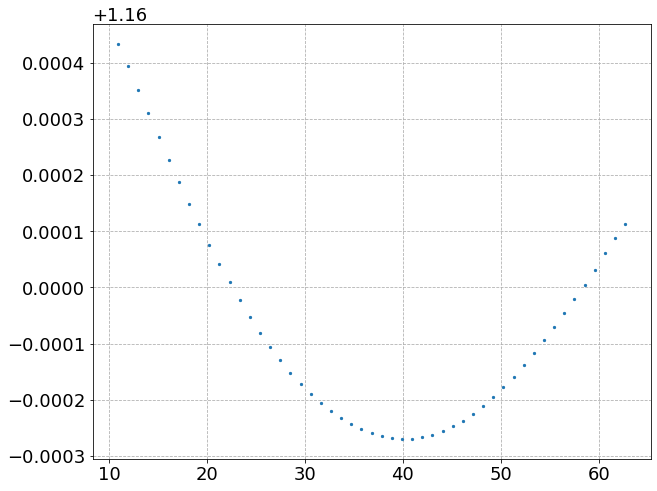

In [98]:
fig, ax = plt.subplots()
ax.scatter(df_line['magnet_X_mm'], df_line['NMR [T]'], s=5)

In [34]:
df_['Magnet Current [V]']

Datetime
2021-06-14 15:18:55    224.061757
2021-06-14 15:29:35    224.061587
2021-06-14 15:40:13    224.061360
2021-06-14 15:50:51    224.061587
2021-06-14 16:01:28    224.061643
2021-06-14 16:12:07    224.061360
2021-06-14 16:22:44    224.061360
2021-06-14 16:33:59    224.061530
2021-06-14 16:44:41    224.061360
2021-06-14 16:55:18    224.061700
2021-06-14 17:05:52    224.061360
2021-06-14 17:16:30    224.061360
2021-06-14 17:27:12    224.061360
2021-06-14 17:37:50    224.061360
2021-06-14 17:49:02    224.061360
2021-06-14 17:59:41    224.061417
2021-06-14 18:10:20    224.061473
2021-06-14 18:20:59    224.061360
2021-06-14 18:31:36    224.061360
2021-06-14 18:42:15    224.061417
2021-06-14 18:53:26    224.061360
2021-06-14 19:04:03    224.061587
2021-06-14 19:14:41    224.061360
2021-06-14 19:25:20    224.061417
2021-06-14 19:35:59    224.061530
2021-06-14 19:46:37    224.061360
2021-06-14 19:57:19    224.061530
2021-06-14 20:08:33    224.061417
2021-06-14 20:19:16    224.061700
2021-

In [99]:
#df2 = load_data(ddir+'2021-06-14 104019.txt')
df2 = load_data(ddir+'2021-06-15 073806.txt')

In [100]:
df2_ = df2.query('223 <= `Magnet Current [V]` <= 225')

In [104]:
37.5 + 20., 37.5 - 20.

(57.5, 17.5)

In [110]:
37.8 + 20., 37.8 - 20.

(57.8, 17.799999999999997)

In [125]:
y0 = df2_.magnet_Y_mm.iloc[1]
z0 = df2_.magnet_Z_mm.iloc[1]

In [126]:
y0, z0

(124.6, 124.5)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ckampa/data/hallprobecalib_extras/plots/pole_to_pole/06-14-21_15:11/pole_to_pole_comparison.pdf'

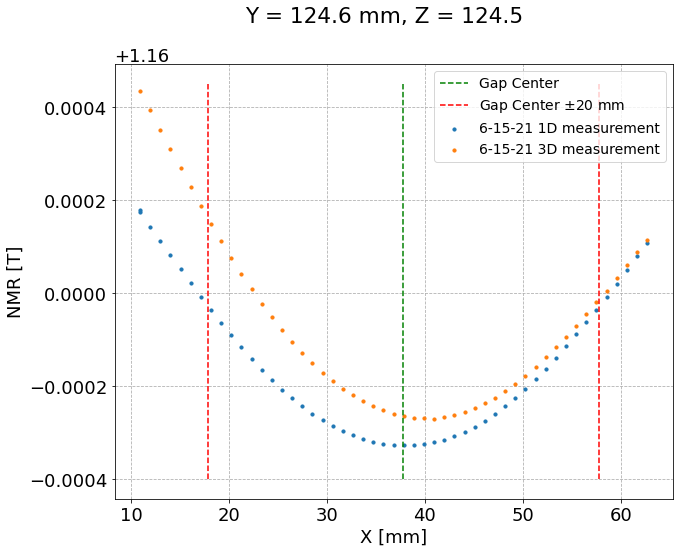

In [129]:
fig, ax = plt.subplots()
ax.scatter(df2_['magnet_X_mm'], df2_['NMR [T]'], s=10, label='6-15-21 1D measurement')
ax.scatter(df_line['magnet_X_mm'], df_line['NMR [T]'], s=10, label='6-15-21 3D measurement')
ax.plot([37.8, 37.8], [1.16-4e-4, 1.16+4.5e-4], 'g--', label='Gap Center')
ax.plot([17.8, 17.8], [1.16-4e-4, 1.16+4.5e-4], 'r--', label=r'Gap Center $\pm 20$ mm')
ax.plot([57.8, 57.8], [1.16-4e-4, 1.16+4.5e-4], 'r--')
ax.set_xlabel('X [mm]')
ax.set_ylabel('NMR [T]')
fig.suptitle(f'Y = {y0} mm, Z = {z0}')
ax.legend(fontsize=14, loc='upper right');
fig.savefig(plotdir+'pole_to_pole_comparison.pdf', facecolor='white', transparent=False)
fig.savefig(plotdir+'pole_to_pole_comparison.png', facecolor='white', transparent=False)

In [108]:
idx = df2_['NMR [T]'].argmin()

In [109]:
df2_.iloc[idx]

Time                    6/15/2021 7:48:47 AM
Magnet Current [V]                 224.06119
Magnet Voltage [V]                 29.201067
NMR [T]                             1.159672
NMR [FFT]                                0.0
Zaber_Pattern_X                     491142.0
Zaber_Pattern_Y                     416169.0
Zaber_Pattern_Z                    1649035.0
Zaber_Meas_Encoder_X                491142.0
Zaber_Meas_Micron_X             191852.34375
Zaber_Meas_Encoder_Y                416169.0
Zaber_Meas_Micron_Y            162566.015625
Zaber_Meas_Encoder_Z               1649035.0
Zaber_Meas_Micron_Z            644154.296875
seconds_delta                          640.0
hours_delta                         0.177778
days_delta                          0.007407
magnet_X_mm                        37.834375
magnet_Y_mm                            124.6
magnet_Z_mm                            124.5
Name: 2021-06-15 07:48:47, dtype: object

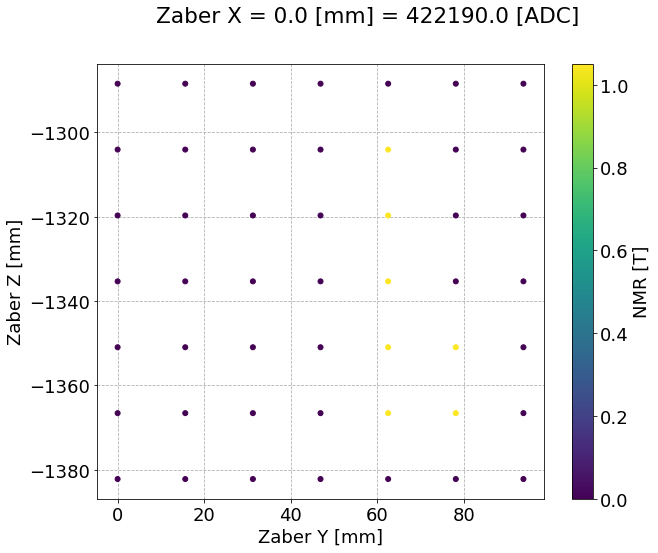

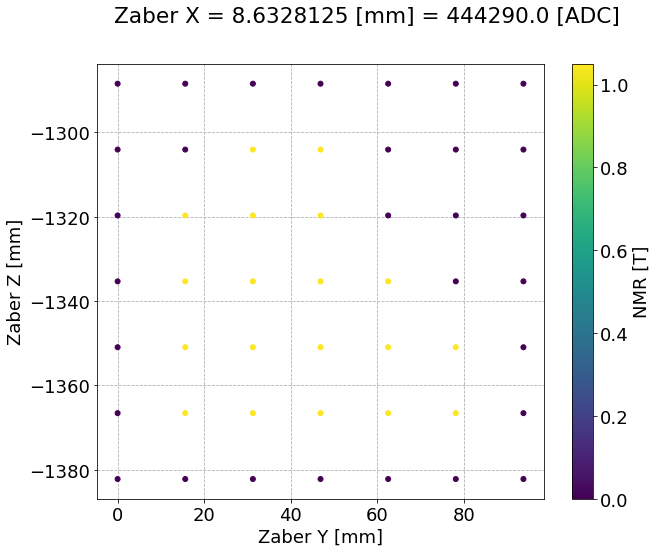

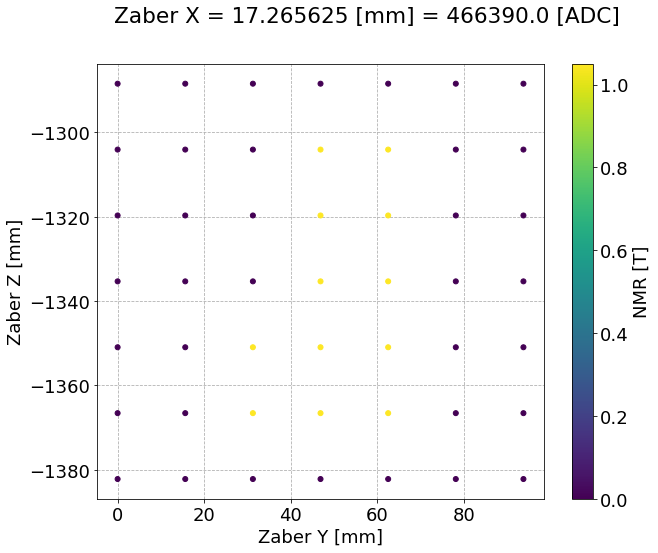

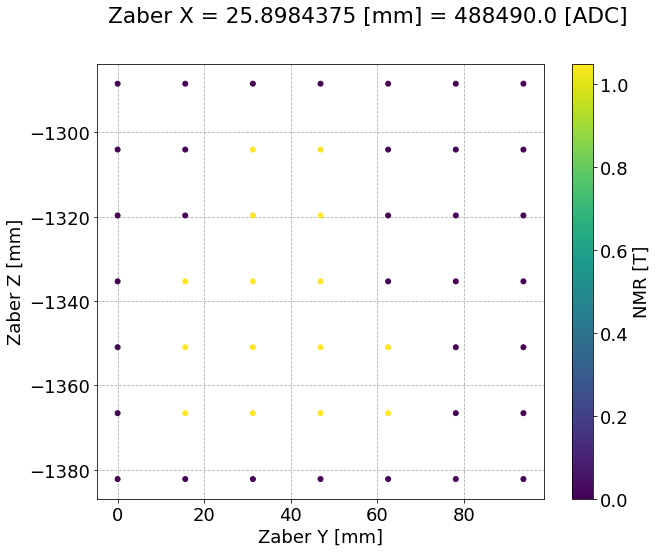

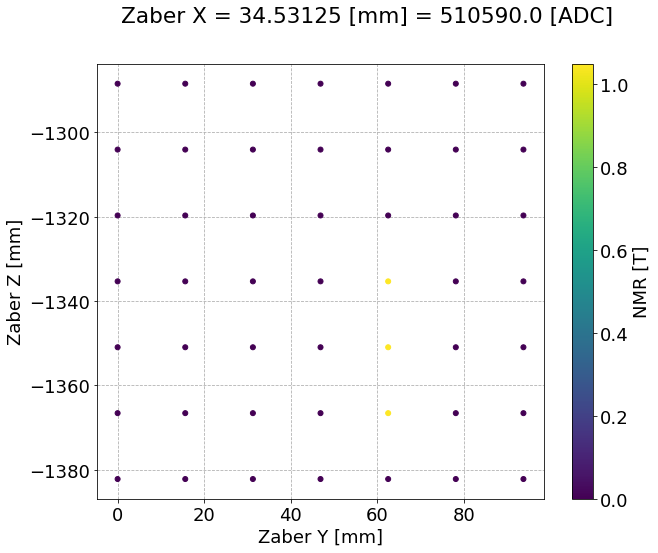

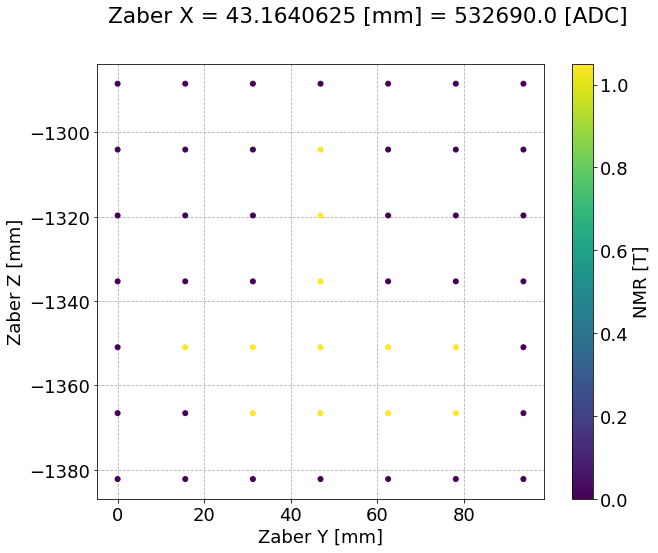

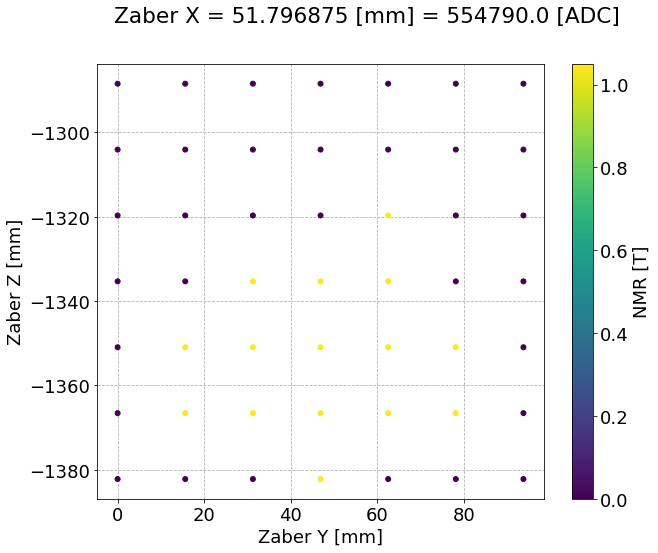

In [279]:
for xval in df['Zaber_Pattern_X'].unique():
    fig, ax = plot_xplane(df, xval, f'{plotdir_pattern}xslices/NMR_vs_Z_vs_Y_{int(xval):d}')